1. In a study, the researchers wish to see the percentage of registered voters in a population who were in favor of candidate A in an election was more than 40%. A random sample of registered voters in this population was taken. Among 800 people participated in the survey, 380 of them voted for candidate A. a) Report the 95% confidence interval for estimating the percentage of people in the population who would vote for candidate A. Please use point estimate ± margin of error format to report the confidence interval.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, ttest_1samp, probplot

In [2]:
p_hat=380/800
p_hat_1=1-p_hat
Z = 1.96
marginOfError=Z*(p_hat*p_hat_1/800)**0.5
print(f"95% confidence interval for estimating the percentage of people in the population who would vote for candidate A in the range: \n{p_hat-marginOfError:.4f} to {p_hat+marginOfError:.4f}.")

95% confidence interval for estimating the percentage of people in the population who would vote for candidate A in the range: 
0.4404 to 0.5096.


b) If the researchers would like to estimate a sample size for the study, and there is no prior knowledge of the proportion, how large a sample would be needed for constructing a confidence interval for estimating the percentage of people will be in favor of candidate A with a 95 confidence level and a 2% margin of error?

In [3]:
marginError=0.02
confidence_level=0.95
print("formula: marginOfError= Z*np.sqrt(p_hat*(p_hat-1)/sample_size)")
p = 0.5
sample_size= (Z/marginError)**2*p*(1-p)
print(f"sample would be needed for constructing a confidence interval for estimating the percentage of people will be in favor of candidate A \
with a 95 confidence level and a 2% margin of error: {int(sample_size)}")

formula: marginOfError= Z*np.sqrt(p_hat*(p_hat-1)/sample_size)
sample would be needed for constructing a confidence interval for estimating the percentage of people will be in favor of candidate A with a 95 confidence level and a 2% margin of error: 2401


Question:2 a) Perform a statistical hypothesis test using 5% as the level of significance to see if the average arm span for the 11th graders in Ohio is more than 160 cm. You must state null and alternative hypothesis, check normality assumption, report test statistic value, report p-value, and draw a proper conclusion. (mean=200) Null hypothesis: The average arm span for the students is 160cm Alternative hypothesis: The average arm span for students is more than 160 cm Report p-value from the normality test, make a quantile-comparison plot, and draw a conclusion.

In [4]:
Null_hypothesis="The average arm span for the students is 160cm."
Alternative_hypothesis="The average arm span for students is more than 160 cm"

arm_span_data = [200] * 30

# Hypothesis Test
mu = 160
alpha = 0.05

# Normality Test
stat, p_value = shapiro(arm_span_data)
print(f"Shapiro-Wilk Test: Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > alpha:
    print("The data is normally distributed.")
else:
  print("The data is not normally distributed.")

# Perform one-sample t-test
sample_mean = np.mean(arm_span_data)
sample_std = np.std(arm_span_data, ddof = 1)
n = len(arm_span_data)
z_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))
p_value_test = 1 - norm.cdf(z_stat)

print(f"Z-Statistic: {z_stat:.4f}, p-value: {p_value_test:.4f}")
if p_value_test < alpha:
    print("Reject the null hypothesis: The avg arm span is more than 160 cm.")
else:
  print("Fail to reject the null hypothesis: No evidence that the average arm span is more than 160 cm.")

Shapiro-Wilk Test: Test Statistic = 1.0000, p-value = 1.0000
The data is normally distributed.
Z-Statistic: inf, p-value: 0.0000
Reject the null hypothesis: The avg arm span is more than 160 cm.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-4-815f94e96e9d>:22: RuntimeWarning: divide by zero encountered in scalar divide
  z_stat = (sample_mean - mu) / (sample_std / np.sqrt(n))


b) Find the 95% confidence interval for estimating the average arm span for the sampled population.

95% Confidence For Mean: (200.00, 200.00)


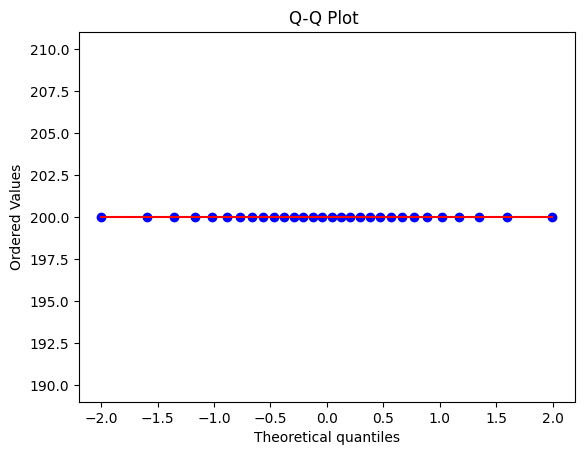

In [5]:
# Confidence interval
Z = 1.96        # Z-value for 95% confidence level
margin_of_error = Z * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence For Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

# Q-Q Plot
probplot(arm_span_data, dist = 'norm', plot = plt)
plt.title("Q-Q Plot ")
plt.show()